In [ ]:
# Objectives
# Repeat the data analysis in Matlab using python

In [38]:
# import lib and set environments
import scipy.io as sio
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy import stats
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
from sklearn import linear_model
import statsmodels.api as sm
from sklearn.linear_model import SGDClassifier
from sklearn import metrics

In [3]:
# %reset
# import data:
# Map
worldmap = sio.loadmat('/home/calvin/Research_work/map_data/world_map')
chinamap = sio.loadmat('/home/calvin/Research_work/map_data/China_map.mat')

obs = sio.loadmat('/home/calvin/Research_work/Atmospheric_stability/Finalise/obs.mat')
predictors = sio.loadmat('/home/calvin/Research_work/Atmospheric_stability/Finalise/daily_predictors_smooth.mat')

date = sio.loadmat('/home/calvin/Research_work/Atmospheric_stability/Finalise/DATE.mat')

In [4]:
# Create an index for the days in each month
x = np.arange(1,9126)
Mdate = date['DATE_l']
sample = np.where((Mdate[:,0,0] >= 1998))
sample_date = Mdate[sample,:,0]

#sample_date = Mdate[]
#Mdate.shape
#print(Mdate[:,:,0])

mday_all = []
for y in range(0,6):
    yr = y+1998
    for mth in range(0,12):
        mday = np.where((sample_date[0,:,0] == yr) & (sample_date[0,:,1] == mth+1))
        mday_all.append(mday)

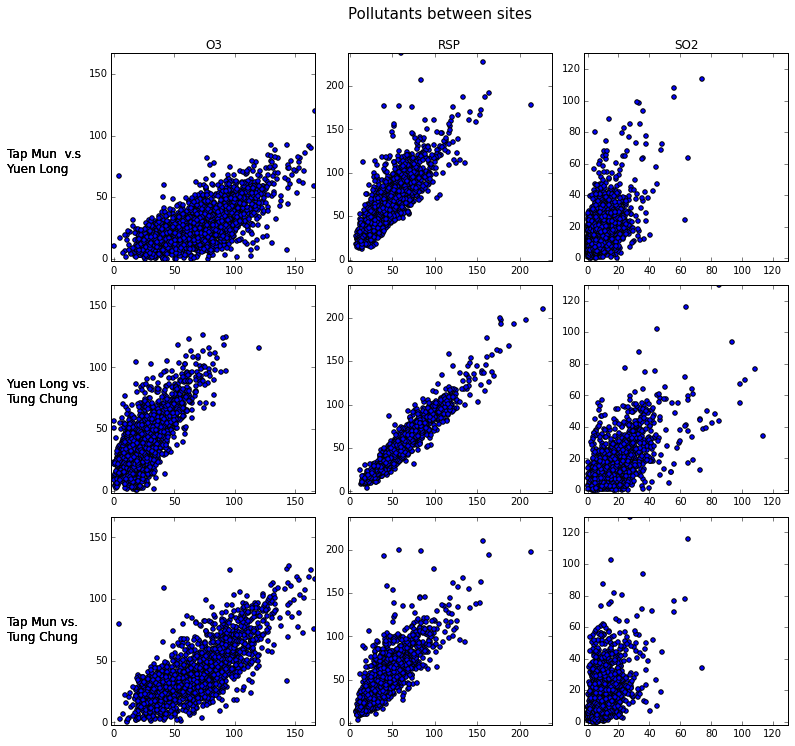

In [5]:
# Plot pollutants concentrate in sites
Pollutant = obs['Pollutant']
Pname = ['O3','RSP','SO2']
#print(predictors)
#Pollutant.shape

plt.figure(figsize=(10,10))
for PN in range(4,7):
    plt.subplot(3,3,PN-3)
    plt.scatter(Pollutant[:,PN,0],Pollutant[:,PN,1])
    maxP = np.nanmax(Pollutant[:,PN,:])
    plt.axis([-2,maxP,-2,maxP])
    plt.subplot(3,3,PN)
    plt.scatter(Pollutant[:,PN,1],Pollutant[:,PN,2])
    maxP = np.nanmax(Pollutant[:,PN,:])
    plt.axis([-2,maxP,-2,maxP])
    plt.subplot(3,3,PN+3)
    plt.scatter(Pollutant[:,PN,0],Pollutant[:,PN,2])
    maxP = np.nanmax(Pollutant[:,PN,:])
    plt.axis([-2,maxP,-2,maxP])

    plt.tight_layout()
    plt.subplot(3,3,PN-3)
    plt.title(Pname[PN-4])
    #plt.axes().set_aspect('equal')
    plt.suptitle("Pollutants between sites",fontsize=15, y=1.03)
    plt.figtext(-0.1,0.8,'Tap Mun  v.s \nYuen Long',size='large')
    plt.figtext(-0.1,0.48,'Yuen Long vs. \nTung Chung',size='large')
    plt.figtext(-0.1,0.15,'Tap Mun vs. \nTung Chung',size='large')

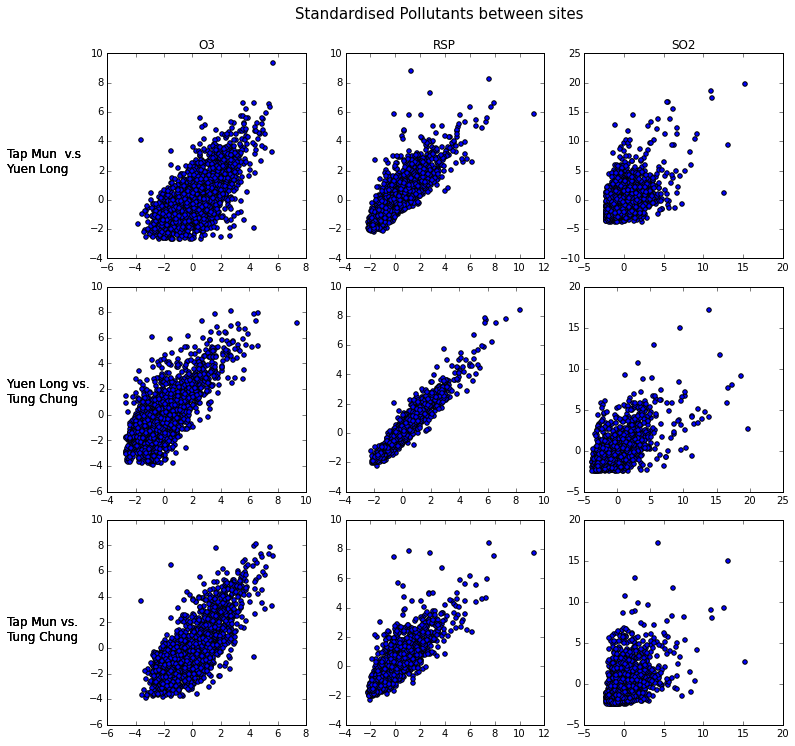

In [6]:
# Calculate standardise pollutants level by monthly mean

Pmean = []
Pmonth = np.empty((72,7,3))
Pmonth[:] = np.nan

# convert daily data into month data
for mth in range(0,np.size(mday_all)):
    for PN in range(0,7):
        for site in range(0,3):
            Pmean = np.nanmean(Pollutant[mday_all[mth],PN,site])
            Pmonth[mth,PN,site] = Pmean

# calculate monthly mean and standard deviation
PMEAN = np.empty((7,3))
PMEAN[:] = np.nan
PSTD = np.empty((7,3))
PSTD[:] = np.nan
for PN in range(0,7):
    for site in range(0,3):
        PMEAN[PN,site] = np.nanmean(Pmonth[:,PN,site])
        PSTD[PN,site] = np.nanstd(Pmonth[:,PN,site])

# Calculate standardised pollutant concentration
# standardised pollutant = (pollutant - mean) / std    

st_pollutant = np.empty((2190,7,3))
st_pollutant[:] = np.nan
for d in range(0,2190):
    for PN in range(0,7):
        for site in range(0,3):
            st_pollutant[d,PN,site] = (Pollutant[d,PN,site]-PMEAN[PN,site])/PSTD[PN,site]

# Plot standardise pollutant concentration to show pollutants in different sites are correlated to each others 
plt.figure(figsize=(10,10))
for PN in range(4,7):
    plt.subplot(3,3,PN-3)
    plt.scatter(st_pollutant[:,PN,0],st_pollutant[:,PN,1])
    #maxP = np.nanmax(st_pollutant[:,PN,:])
    #plt.axis([-2,maxP,-2,maxP])
    plt.subplot(3,3,PN)
    plt.scatter(st_pollutant[:,PN,1],st_pollutant[:,PN,2])
    #maxP = np.nanmax(st_pollutant[:,PN,:])
    #plt.axis([-2,maxP,-2,maxP])
    plt.subplot(3,3,PN+3)
    plt.scatter(st_pollutant[:,PN,0],st_pollutant[:,PN,2])
    #maxP = np.nanmax(st_pollutant[:,PN,:])
    #plt.axis([-2,maxP,-2,maxP])

    plt.tight_layout()
    plt.subplot(3,3,PN-3)
    plt.title(Pname[PN-4])
    plt.suptitle("Standardised Pollutants between sites",fontsize=15, y=1.03)
    plt.figtext(-0.1,0.8,'Tap Mun  v.s \nYuen Long',size='large')
    plt.figtext(-0.1,0.48,'Yuen Long vs. \nTung Chung',size='large')
    plt.figtext(-0.1,0.15,'Tap Mun vs. \nTung Chung',size='large')

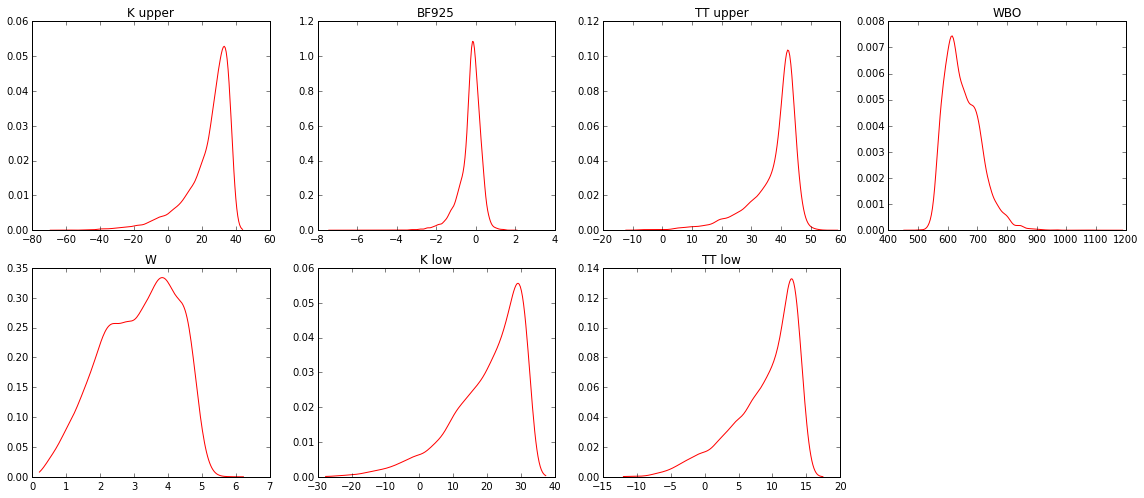

In [16]:
# Plot Predictors distributions
predictor_name = ['K upper', 'BF925', 'TT upper', 'WBO', 'W', 'K low', 'TT low']
PreDs_CF = predictors['preDs_CF']
plt.figure(figsize=(16,7))
for var in range(0,7):
    plt.subplot(2,4,var+1) # for location (3,3)
    plt.tight_layout()
    data = PreDs_CF[var,3,3,:]
    data = data[~np.isnan(data)]
    kde = stats.gaussian_kde(data)
    x = np.linspace(data.min()-(data.min()*0.1), data.max()*1.1, 200)
    p = kde(x)
    plt.plot(x,p,color = 'red')
    plt.title(predictor_name[var])

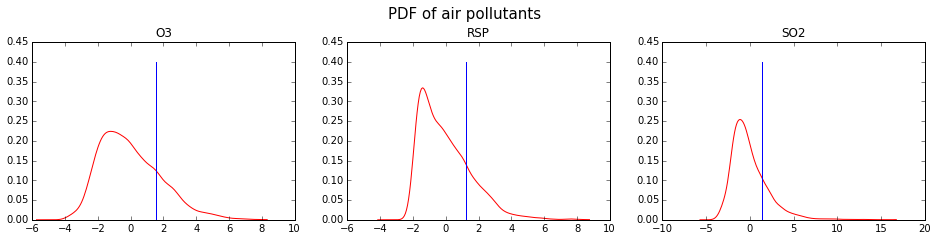

In [17]:
# PDF of Air pollutants and 90th Percentile
plt.figure(figsize=(16,7))
for PN in range(4,7):
    plt.subplot(2,3,PN-3)
    missing = np.isnan(Poll_sample[:,PN])
    Polln = Poll_sample[~missing,PN]
    kdeO = stats.gaussian_kde(Polln)
    xx = np.linspace(np.percentile(Polln, 0.1)-2, np.percentile(Polln, 99.9)+1, 200)
    pdfO = kdeO(xx)
    plt.plot(xx,pdfO,color = 'red',label="Obs")  
    p80 = np.percentile(Polln, 80)
    plt.plot([p80,p80],[0,0.4],color = 'blue')
    plt.title(Pname[PN-4])
#    p95 = np.percentile(Polln, 95)
#    plt.plot([p95,p95],[0,0.8],color = 'purple')

plt.suptitle("PDF of air pollutants",fontsize=15, y=0.97)

In [89]:
# Create a classifier to separate Stable and NU conditions by filtering the stability index

PRED_sample1 = PreDs_CF[:,3,4,Sample.T][:,:,0]
PRED_sample2 = PreDs_CF[:,3,3,Sample.T][:,:,0]
PRED_sample3 = PreDs_CF[:,3,2,Sample.T][:,:,0]
PRED_sample = (np.concatenate((PRED_sample1,PRED_sample2,PRED_sample3),axis=1)).T

# Pollutants sample
Poll_sample = np.concatenate((st_pollutant[:,:,0],st_pollutant[:,:,1],st_pollutant[:,:,2]),axis=0)

missing = np.isnan(Poll_sample[:,4:7]).any(1)
Polln = Poll_sample[~missing,:]
PREDn = PRED_sample[~missing,:]

#PRED_sample.shape

Fstab = np.where((PREDn[:,0] < 25) & 
                 (PREDn[:,1] < -0.7) &
                 (PREDn[:,2] < 35) &
                 (PREDn[:,3] < 3500) &
                 (PREDn[:,4] < 3) &
                 (PREDn[:,5] < 20) &
                 (PREDn[:,6] < 12))

Polln_st = Polln[Fstab[0],4:7]
Polln_nu = np.delete(Polln[:,4:7], (Fstab[0]), axis=0)

# print(Polln_nu.shape, Polln_st.shape)
# Polln_nu.shape

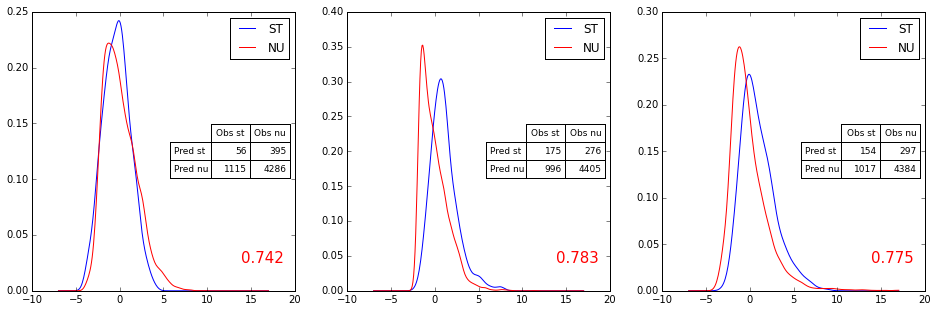

In [41]:
# Compare stable case with Pollutant's concentration
plt.figure(figsize=(16,5))
for i in range(0,3):
    PN = 4+i
    plt.subplot(1,3,i+1) 
    kdePs = stats.gaussian_kde(Polln_st[:,i])
    kdePn = stats.gaussian_kde(Polln_nu[:,i])
    xx = np.linspace(-7, 17, 300)
    #pdfO = kdeO(xx)
    pdfPs = kdePs(xx)
    pdfPn = kdePn(xx)  
    plt.plot(xx,pdfPs,color = 'blue',label="ST")
    plt.plot(xx,pdfPn,color = 'red',label="NU")
    plt.legend() 
    SC = np.empty((Polln[:,PN].size))
    SC[(Polln[:,PN] < np.percentile(Polln[:,PN], 80))] = 0 # Neutral and unstable conditions
    SC[(Polln[:,PN] >= np.percentile(Polln[:,PN], 80))] = 1 # Stable condition
    YR = np.empty((Polln[:,PN].size))
    YR[:] = 0
    YR[Fstab[0]] = 1
    Result = np.array([SC,YR]).T
    R1 = np.where((Result[:,0] == 1) & (Result[:,1] == 1))
    R2 = np.where((Result[:,0] == 0) & (Result[:,1] == 1))
    R3 = np.where((Result[:,0] == 1) & (Result[:,1] == 0))
    R4 = np.where((Result[:,0] == 0) & (Result[:,1] == 0))
    r1, r2, r3, r4 = len(R1[0]), len(R2[0]), len(R3[0]), len(R4[0])
    #print(len(R1[0]), len(R2[0]), len(R3[0]), len(R4[0]))
    col_labels=['Obs st','Obs nu']
    row_labels=['Pred st','Pred nu']
    table_vals=[[r1,r2],[r3,r4]]
    Rtable = plt.table(cellText=table_vals, colWidths = [0.1]*2, rowLabels=row_labels, colLabels=col_labels, loc='center right') 
    Rtable.set_fontsize(15)
    Rtable.scale(1.5, 1.5)
    plt.annotate(str(np.round_(metrics.accuracy_score(SC, YR), decimals=3)), xy=(0.8, 0.1), xycoords='axes fraction',color = 'red',size =15)

In [42]:
# Correlation between standardised pollutant concentration and predictors
data = np.array([Polln[:,4],Polln[:,5],Polln[:,6],PREDn[:,0],PREDn[:,1],PREDn[:,2],PREDn[:,3],PREDn[:,4],PREDn[:,5],PREDn[:,6]]).T
frame = pd.DataFrame(data, columns=['O3','RSP','SO2','K_up','BF925','TT_up','WBO','W','K_low','TT_low'])
frame.corr()

,O3,RSP,SO2,K_up,BF925,TT_up,WBO,W,K_low,TT_low
O3,1.000000,0.434721,-0.005670,-0.285223,0.127784,-0.245692,0.183722,-0.275155,-0.186644,-0.038578
RSP,0.434721,1.000000,0.535165,-0.544460,-0.041356,-0.543210,0.554651,-0.623511,-0.602567,-0.465711
SO2,-0.005670,0.535165,1.000000,-0.241440,0.032748,-0.233372,0.236255,-0.266366,-0.307260,-0.279418
K_up,-0.285223,-0.544460,-0.241440,1.000000,0.200643,0.869990,-0.861677,0.874844,0.792337,0.616780
BF925,0.127784,-0.041356,0.032748,0.200643,1.000000,0.343586,-0.389722,0.332599,0.402777,0.483451
TT_up,-0.245692,-0.543210,-0.233372,0.869990,0.343586,1.000000,-0.788427,0.817660,0.849866,0.675731
WBO,0.183722,0.554651,0.236255,-0.861677,-0.389722,-0.788427,1.000000,-0.955187,-0.857697,-0.716641
W,-0.275155,-0.623511,-0.266366,0.874844,0.332599,0.817660,-0.955187,1.000000,0.896815,0.762154
K_low,-0.186644,-0.602567,-0.307260,0.792337,0.402777,0.849866,-0.857697,0.896815,1.000000,0.919449
TT_low,-0.038578,-0.465711,-0.279418,0.616780,0.483451,0.675731,-0.716641,0.762154,0.919449,1.000000


In [83]:
# Separate data into calibration (cal) and validation (val)
total = np.arange(0, 6570, 1)
val = np.arange(4, 6570, 4)
cal = np.delete(total, (val), axis=0)
PRED_sample_c = PRED_sample[cal,:]
PRED_sample_v = PRED_sample[val,:]
Poll_sample_c = Poll_sample[cal,:]
Poll_sample_v = Poll_sample[val,:]




(4928, 7)

In [120]:
coef_nu = np.array([[1.9,1.2,2.3],[-0.5,-0.3,-0.5]])
coef_st = np.array([[1.9,1.2,2.3],[-0.5,-0.3,-0.5]])
coef_st[0,0], coef_st[1,0]


(1.8999999999999999, -0.5)

[-6, 10, -6, 10]

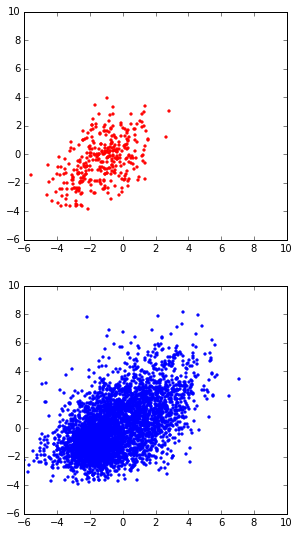

In [138]:
# Statistical model calibration

coef_nu = np.array([[1.9,1.2,2.3],[-0.5,-0.3,-0.5]])
coef_st = np.array([[1.9,1.2,2.3],[-0.5,-0.3,-0.5]])
range_min = [-6, -3, -4]
range_max = [10, 9, 20]

PN = 4
missing = np.isnan(Poll_sample_c[:,PN])
Polln = Poll_sample_c[~missing,:]
PREDn = PRED_sample_c[~missing,:]

Fstab = np.where((PREDn[:,0] < 25) & 
                 (PREDn[:,1] < -0.7) &
                 (PREDn[:,2] < 35) &
                 (PREDn[:,3] < 3500) &
                 (PREDn[:,4] < 3) &
                 (PREDn[:,5] < 20) &
                 (PREDn[:,6] < 12))

Fall = np.arange(0, len(PREDn), 1)
Fnu = np.delete(Fall, (Fstab[0]), axis=0)

plt.figure(figsize=(16,9))
plt.subplot(2,3,1)
clf = linear_model.LinearRegression()
OBS_st = Polln[Fstab[0],PN]
Predictor = PREDn[Fstab[0],:]
clf.fit(Predictor,OBS_st)
PRE_st = clf.predict(PREDn[Fstab[0]])*coef_st[0,PN-4]+coef_st[1,PN-4]
plt.scatter(PRE_st,OBS_st,color ='red',s = 5)
plt.axis([range_min[PN-4],range_max[PN-4],range_min[PN-4],range_max[PN-4]])

plt.subplot(2,3,4)
clf = linear_model.LinearRegression()
OBS_nu = Polln[Fnu,PN]
Predictor = PREDn[Fnu,:]
clf.fit(Predictor,OBS_nu)
PRE_nu = clf.predict(PREDn[Fnu])*coef_nu[0,PN-4]+coef_st[1,PN-4]
plt.scatter(PRE_nu,OBS_nu, color ='blue',s = 5)
plt.axis([range_min[PN-4],range_max[PN-4],range_min[PN-4],range_max[PN-4]])

In [144]:
clf.coef_

array([-0.01060181, -0.10687361,  0.02032363, -0.04037938, -2.48714097,
       -0.1254588 ,  0.31842911])

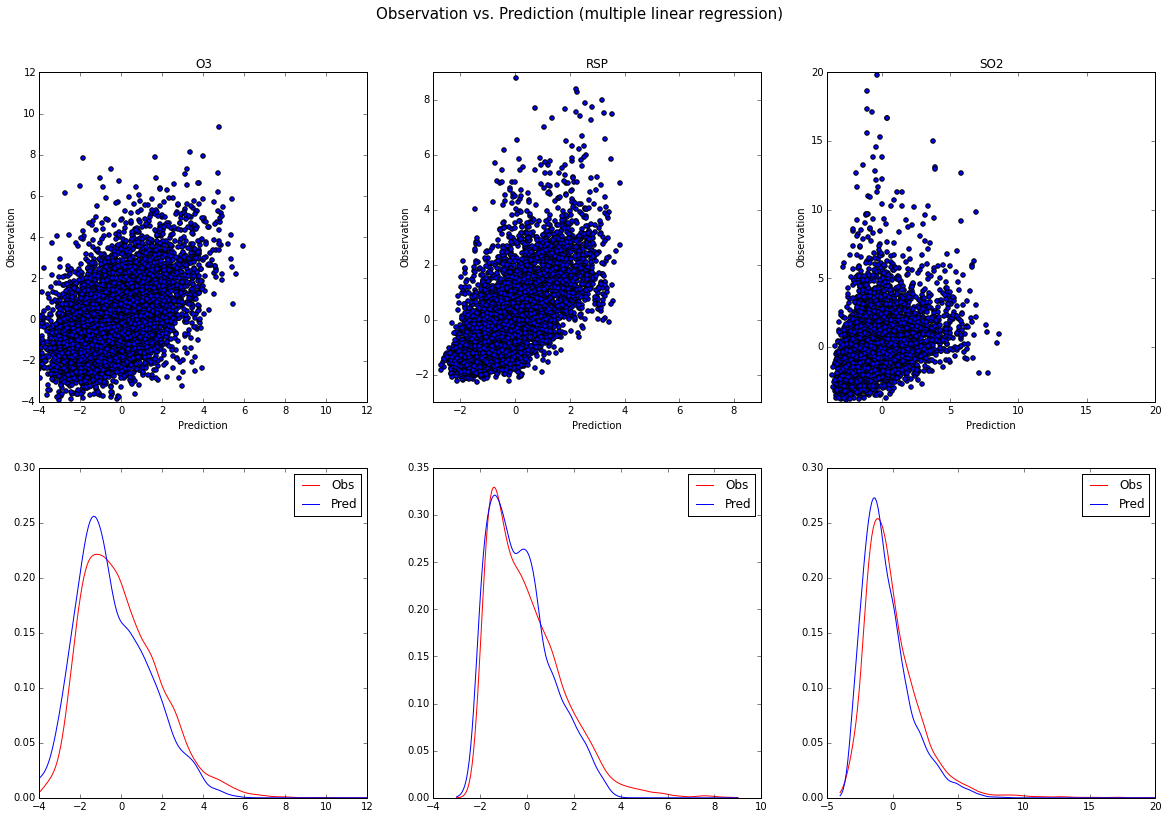

In [70]:
# Create a multiple linear regression to predict air pollutants concentration
clf = linear_model.LinearRegression()
plt.figure(figsize=(20,13))
coef1 = [1.9,1.2,2.3]
coef2 = [-0.5,-0.3,-0.5]
range_min = [-4, -3, -4]
range_max = [12, 9, 20]

for PN in range(4,7):
    Observation = Polln[:,PN]
    clf.fit(PREDn,Observation)
    #LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)
    #clf.coef_
    Prediction = clf.predict(PREDn)*coef1[PN-4]+coef2[PN-4]
    plt.subplot(2,3,PN-3)
    plt.scatter(Prediction,Observation)
    plt.title(Pname[PN-4])
    plt.axis([range_min[PN-4],range_max[PN-4],range_min[PN-4],range_max[PN-4]])
    plt.xlabel('Prediction')
    plt.ylabel('Observation')
    
    plt.subplot(2,3,PN)
    kdeO = stats.gaussian_kde(Observation)
    kdeP = stats.gaussian_kde(Prediction)
    xx = np.linspace(range_min[PN-4],range_max[PN-4], 200)
    pdfO = kdeO(xx)
    pdfP = kdeP(xx)    
    plt.plot(xx,pdfO,color = 'red',label="Obs")    
    plt.plot(xx,pdfP,color = 'blue',label="Pred")
    plt.legend()
plt.suptitle("Observation vs. Prediction (multiple linear regression)",fontsize=15, y=0.97)    
